In [2]:
# Config this setting for activating auto-completer!
%config Completer.use_jedi = False

### 1. Importing libreries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.express as px
import pandas_profiling
from pandas_profiling import ProfileReport
from collections import Counter
from datetime import datetime as dt
import seaborn as sns
import copy

%matplotlib inline

In [4]:
print(f"Today is:\n{dt.today()}")
print(f"Pandas Version:{pd.__version__}")
print(f"Numpy Version:{np.__version__}")
print(f"matplotlib Version:{matplotlib.__version__}")
print(f"Seaborn Version:{sns.__version__}")
print(f"Pandas_Profiling Version:{pandas_profiling.__version__}")


Today is:
2021-06-09 14:49:25.250767
Pandas Version:1.2.4
Numpy Version:1.20.2
matplotlib Version:3.3.4
Seaborn Version:0.11.1
Pandas_Profiling Version:2.9.0


In [5]:
# matplotlib configuration setting:

plt.rc('font', size=12)           #controls default text sizes
plt.rc('axes', titlesize=14)      #fontsize of the axes title
plt.rc('axes', labelsize=12)      #fontsize of the x and y labels
plt.rc('xtick', labelsize=12)     #fontsize of the tick labels
plt.rc('ytick', labelsize=12)     #fontsize of the tick labels
plt.rc('legend', fontsize=12)     #legend fontsize
plt.rc('figure', titlesize=14)    #fontsize of the figure title
# plt.rcParams['figure.dpi'] = 300  #high resolution
sns.set_style('whitegrid')

### 2. Read and loading Dataset

In [6]:
df = pd.read_csv('netflix_titles.csv')

### 3. An overview on Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s344,Movie,"Crazy, Lovely, Cool","Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**Generating profile reports from Data** (data type must be DataFrame) 

A summary of all important information about dataset:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Dealing with Missing/Null Values

In [13]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [14]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have missing values in 5 columns (features):
- ***director***
- ***cast***
- ***country***
- ***date added***
- ***rating***

Let's see what percentage of them are missing values!

In [15]:
def null_rate(df):
    '''
    This function gets a data frame and returns columns with their null values rate.
    '''
    for i in df.columns:
        null_rate = df[i].isna().sum()/len(df) * 100
        if null_rate > 0:
            print(f"Column '{i}' has null rate: {null_rate:.2f}%")

In [16]:
null_rate(df)

Column 'director' has null rate: 30.68%
Column 'cast' has null rate: 9.22%
Column 'country' has null rate: 6.51%
Column 'date_added' has null rate: 0.13%
Column 'rating' has null rate: 0.09%


In [17]:
df['director'].unique().shape[0]

4050

There is 4050 unique values for directors in this database, so it's not a important feature and I will dropp it. And then at this point, I just replace the missing values with 'Null'.

In [18]:
df.drop(['director'], axis=1, inplace=True)

In [19]:
df = df.fillna('Null')

### Question 1
#### How is the contents distributed across the countries? Which countries have the most contents on Netflix?

In [20]:
df['country'].value_counts()

United States                                            2555
India                                                     923
Null                                                      507
United Kingdom                                            397
Japan                                                     226
                                                         ... 
Senegal                                                     1
United Kingdom, France, Belgium, United States, China       1
Spain, Belgium                                              1
France, Luxembourg, United States                           1
United States, Cambodia                                     1
Name: country, Length: 682, dtype: int64

There are some multi-country contents, so I will count these contents for all their producer countries.

#### Let's see the share of countries in Netflix contents:

In [21]:
df['country'].value_counts()/len(df)*100

United States                                            32.811095
India                                                    11.853088
Null                                                      6.510851
United Kingdom                                            5.098241
Japan                                                     2.902273
                                                           ...    
Senegal                                                   0.012842
United Kingdom, France, Belgium, United States, China     0.012842
Spain, Belgium                                            0.012842
France, Luxembourg, United States                         0.012842
United States, Cambodia                                   0.012842
Name: country, Length: 682, dtype: float64

Let's define a function for counting the contents for each individual country:

In [22]:
def country_counter(df):
    try:
        country_data = df['country']
        countries = ','.join(country_data)
        countries = countries.replace(', ', ',')
        countries = countries.replace(' ,', ',')

        # Counting the number of iterations of countries using 'Counter' 
        country_counting = Counter(countries.split(','))
        country_counting = pd.Series(dict(country_counting)).sort_values(ascending=False)
        country_counting.drop(['Null'], axis=0, inplace=True)

    except:
        print('The "county" column not found in given data frame.')
        
    return country_counting

In [23]:
print(f"Number of distict countries: {country_counter(df).shape[0]}\n")
print(country_counter(df))

Number of distict countries: 118

United States         3297
India                  990
United Kingdom         723
Canada                 412
France                 349
                      ... 
Dominican Republic       1
Azerbaijan               1
Bermuda                  1
Ecuador                  1
Montenegro               1
Length: 118, dtype: int64


Now I would like to know which countries have produced the most content?  
In this context, I use the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle) (80/20 rule).

In [24]:
def find_vital_few(country_counting):
    '''
    This function gets list of countries with number of contents and 
    returns number of countries that produced 80% of contents, and also list of them.
    '''
    counter = True
    k = country_counting.shape[0]
    for i in range(k):
        while counter and (sum(country_counting[:i])/sum(country_counting)) >= 0.8:
            counter = False
            vital_few = i
            break
        
    return vital_few ,country_counting[:vital_few].to_frame(name='Number of contents')

In [25]:
country_counting = country_counter(df)
n, top_countries = find_vital_few(country_counting)

In [26]:
top_countries

,Number of contents
United States,3297
India,990
United Kingdom,723
Canada,412
France,349
Japan,287
Spain,215
South Korea,212
Germany,199
Mexico,154


In [27]:
print('Number of top content producer countries:',n, '\n')
print(f'{top_countries}')

sum_top = sum(top_countries['Number of contents'])
sum_all = sum(country_counting)
              
print(f'The share of these countries in content production: {sum_top/sum_all *100:.2f}%')

Number of top content producer countries: 14 

                Number of contents
United States                 3297
India                          990
United Kingdom                 723
Canada                         412
France                         349
Japan                          287
Spain                          215
South Korea                    212
Germany                        199
Mexico                         154
China                          147
Australia                      144
Egypt                          110
Turkey                         108
The share of these countries in content production: 81.03%


 so these 14 countries produced more than 81% of Netflix's contents, Let's visualize the data for these top countries: 

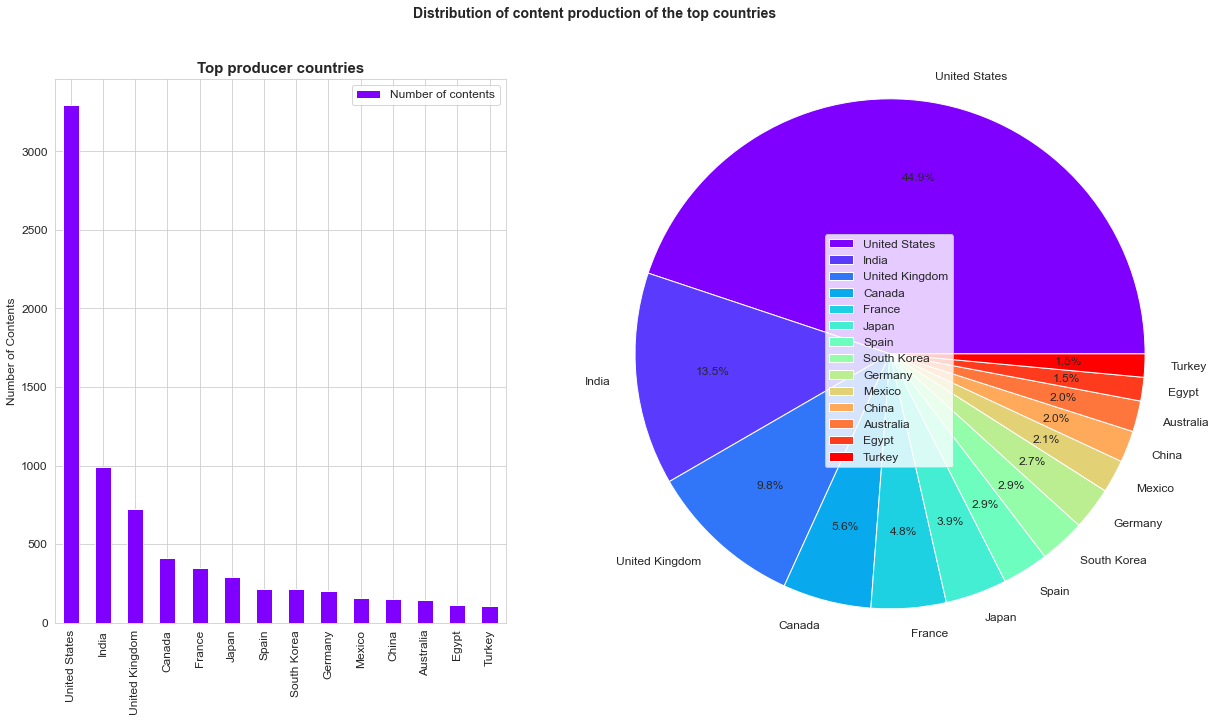

In [28]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Distribution of content production of the top countries", fontsize=14, fontweight='bold')
gs = GridSpec(nrows=1, ncols=2, height_ratios=[3], width_ratios=[8, 10])

ax1 = fig.add_subplot(gs[0])

top_countries.plot(kind='bar', subplots=True, ax=ax1, cmap="rainbow")

ax1.set_title('Top producer countries', fontsize=15, fontweight='bold')
ax1.set_ylabel('Number of Contents')


ax2 = fig.add_subplot(gs[1])

top_countries.plot(kind='pie', subplots=True, ax=ax2, cmap="rainbow", 
                   use_index=True ,autopct='%1.1f%%', pctdistance=0.7
                  )

ax2.label_outer()
ax2.axis('equal')
ax2.legend(loc=10);
# plt.show()

TypeError: bar() got an unexpected keyword argument 'subplots'

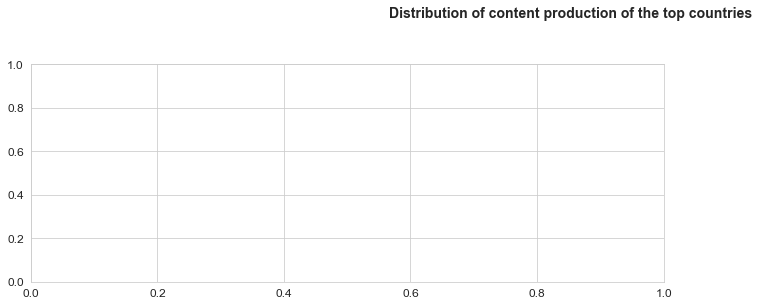

In [31]:
fig = plt.figure(figsize=(20,20))
fig.suptitle("Distribution of content production of the top countries", fontsize=14, fontweight='bold')

gs = GridSpec(nrows=3, ncols=3, 
              width_ratios=[2, 2, 3], 
              height_ratios=[1, 1, 2],
              # left=0.05, right=0.06, 
              hspace=.5, wspace=0.1
             )
ax1 = fig.add_subplot(gs[:-1, :-1])

top_countries.plot(kind='bar', subplots=True, ax=ax1, cmap="rainbow")

ax1.set_title('Top producer countries', fontsize=15, fontweight='bold')
ax1.set_ylabel('Number of Contents')

ax2 = fig.add_subplot(gs[:-1, -1])
top_countries.plot(kind='pie', subplots=True, ax=ax2, cmap="rainbow", use_index=False, autopct='%1.2f%%', pctdistance=0.7)
ax2.axis('equal')
ax2.legend(loc=0)
ax2.label_outer()

ax3 = fig.add_subplot(gs[-1, :])

# squarify.plot(sizes=top_countries.values,
#               label = top_countries.index, color='peachpuff', alpha=0.8
#               #matplotlib.colors(cmap='rainbow')
#              )
# plt.axis('off')



dff = copy.deepcopy(top_countries)

dff['origin'] = 'Netflix'
dff['country'] = dff.index
px.treemap(dff, 
#                   ax=ax3, 
                  path=['origin','country','Number of contents'], 
                  values='Number of contents',
                  names=dff.index,
                  color='Number of contents', 
                  hover_data=['Number of contents'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(dff['Number of contents'], 
                                                      weights=dff['Number of contents'])
                )
# ax3.show()
#              
#              linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
        


In [64]:
top_countries

,Number of contents
United States,3297
India,990
United Kingdom,723
Canada,412
France,349
Japan,287
Spain,215
South Korea,212
Germany,199
Mexico,154


In [ ]:
# dff = px.data.gapminder().query("year == 2007")
# dff

In [ ]:
# dff.columns

In [ ]:
# top_countries

In [35]:
top_countries['origin'] = 'Netflix'
#top_countries['country'] = top_countries.index
figg = px.treemap(top_countries, 
                  path=['origin',top_countries.index,'Number of contents'], 
                  values='Number of contents',
                  labels=top_countries.index,
                  color=top_countries['Number of contents'], 
                  hover_data=['Number of contents'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(top_countries['Number of contents'], 
                                                      weights=top_countries['Number of contents'])
                )
figg.show()

C:\Users\user\Anaconda3\envs\ML\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [ ]:
pieChart = px.pie(top_countries, values='Number of contents', names=top_countries.index, 
                  title=f'Distribution of Content on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

In [ ]:
def plot_barChart(df, column):
    '''
    This function gets a data-frame and a column's name an returns bar chart for given column.
    '''
    if df[column].unique().shape[0] < 5:
        df[column].value_counts().plot(kind='barh')
        
    else:
        df[column].value_counts().plot(kind='bar')

In [ ]:
plot_barChart(df, 'type')

In [ ]:
plot_barChart(df, 'rating')

In [ ]:
def plot_pieChart(df, column):

    if df.shape[1] > 1: 
        groups = df.groupby([column]).size().reset_index(name='counts')
        pieChart = px.pie(groups, values='counts', names=column, 
                          title=f'Distribution of Content {column} on Netflix',
                          color_discrete_sequence=px.colors.qualitative.Set3)
    elif df.shape[1] == 1:
        pieChart = px.pie(df, values=column, names=df.index, 
                          title=f'Distribution of Content {column} on Netflix',
                          color_discrete_sequence=px.colors.qualitative.Set3)
    pieChart.show()

In [ ]:
plot_pieChart(df, 'rating')

In [ ]:
plot_pieChart(top_countries, 'Number of contents')

In [ ]:
squarify.plot(sizes=top_countries.values)

In [ ]:
labels = list(z['rating'])
# explode=(0.7,0.7,0.7,0,0,0,0,0,0,0,0,0,0.7,0.7)

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(list(z['counts']), explode=None, labels=labels, labeldistance=1.08, 
        autopct='%1.2f%%', pctdistance=0.9, radius=2, rotatelabels=True,
        shadow=False, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc='best')
ax1.set_title('Distribution of Content Ratings on Netflix');


In [ ]:
df = df.fillna('NULL')
df['year_added'] = df['date_added'].apply(lambda x :  x.split(',')[-1])
df['year_added'] = df['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
df['year_added'] = df['year_added'].apply(int)

In [ ]:
df.year_added.value_counts()

In [ ]:
?Counter